# Exploratory Data Analysis (EDA)
Analysis of the training data for CW1

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Data

In [3]:
train_df = pd.read_csv("CW1_train.csv")
print(f"Data loaded: {train_df.shape[0]} rows, {train_df.shape[1]} columns")

Data loaded: 10000 rows, 31 columns


## Basic Dataset Information

In [4]:
# Dataset shape
dataset_shape = train_df.shape
print(f"Dataset Shape: {dataset_shape[0]} rows, {dataset_shape[1]} columns")

# Missing values
missing_values = train_df.isnull().sum().sum()
print(f"Total missing values: {missing_values}")

# Column names and types
print("\nColumn Information:")
print(train_df.dtypes)

Dataset Shape: 10000 rows, 31 columns
Total missing values: 0

Column Information:
outcome    float64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
a1         float64
a2         float64
a3         float64
a4         float64
a5         float64
b1         float64
b2         float64
b3         float64
b4         float64
b5         float64
a6         float64
a7         float64
a8         float64
a9         float64
a10        float64
b6         float64
b7         float64
b8         float64
b9         float64
b10        float64
dtype: object


## Check for dups

In [19]:
# Duplicate rows
duplicate_count = train_df.duplicated().sum()
print(f"Duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    print("Example duplicate rows:")
    print(train_df[train_df.duplicated()].head())

Duplicate rows: 0


## Statistical Summary

In [5]:
statistical_summary = train_df.describe()
print(statistical_summary)

            outcome         carat         depth         table         price  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      -4.979081      0.798407     61.748060     57.467360   3910.841900   
std       12.722224      0.472046      1.429631      2.247036   3940.369616   
min      -44.879471      0.200000     50.800000     44.000000    326.000000   
25%      -13.989962      0.400000     61.000000     56.000000    965.000000   
50%       -5.442794      0.710000     61.900000     57.000000   2441.000000   
75%        3.918593      1.040000     62.500000     59.000000   5226.000000   
max       39.675966      4.000000     70.500000     73.000000  18791.000000   

                  x             y             z            a1            a2  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       5.733974      5.741665      3.540757      0.502349      0.507509   
std        1.114850      1.228057      0.692502    

## Outcome Distribution

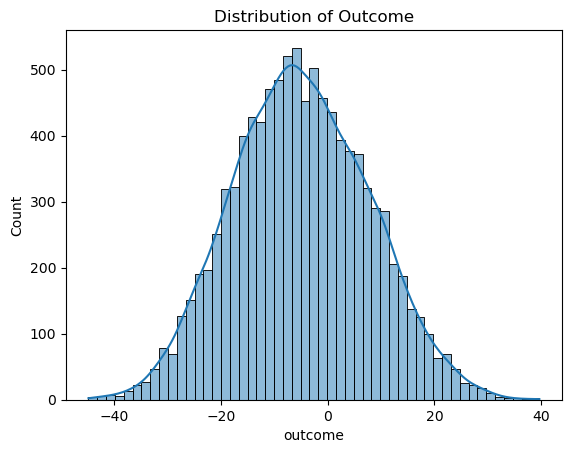

In [6]:
# Check if 'outcome' is skewed (not a bell curve)
sns.histplot(train_df['outcome'], kde=True)
plt.title("Distribution of Outcome")
plt.show()

## Target vs Key Features (Scatter)

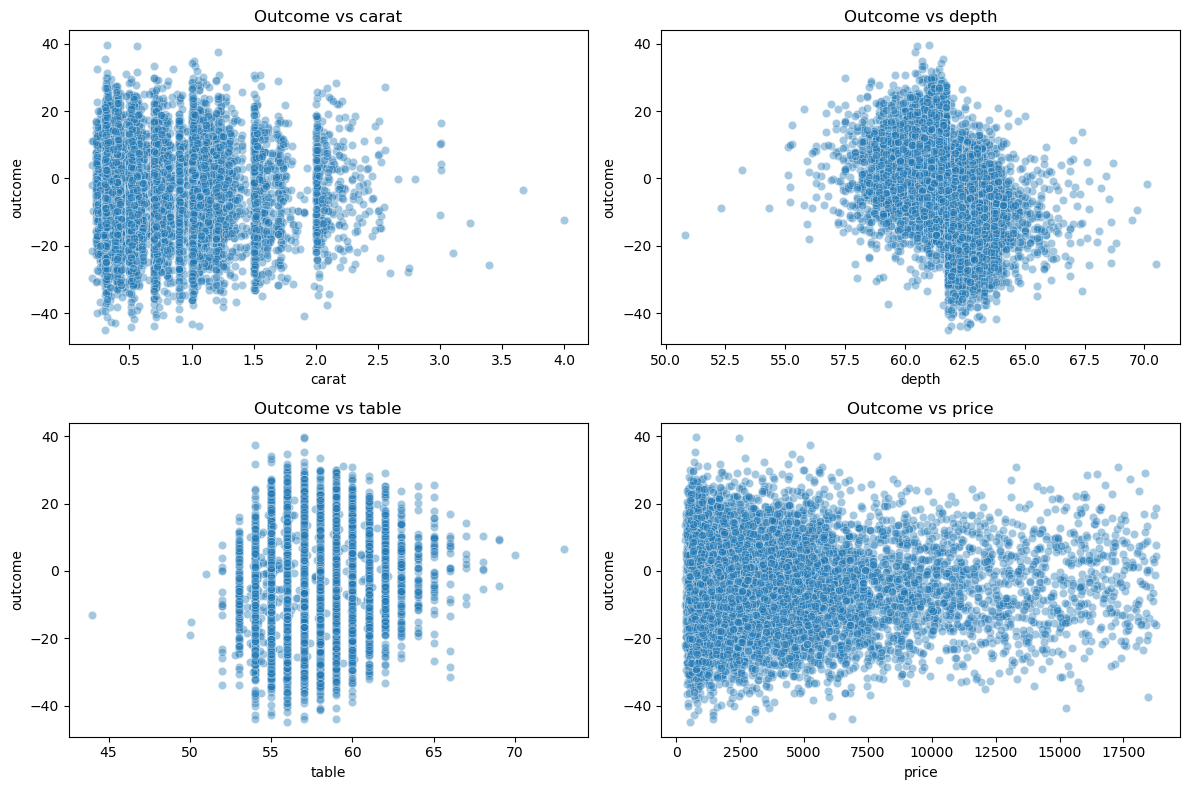

In [20]:
key_features = ['carat', 'depth', 'table', 'price']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for ax, feature in zip(axes, key_features):
    sns.scatterplot(data=train_df, x=feature, y='outcome', alpha=0.4, ax=ax)
    ax.set_title(f"Outcome vs {feature}")

plt.tight_layout()
plt.show()

## Correlation Matrix (Numerical Features)

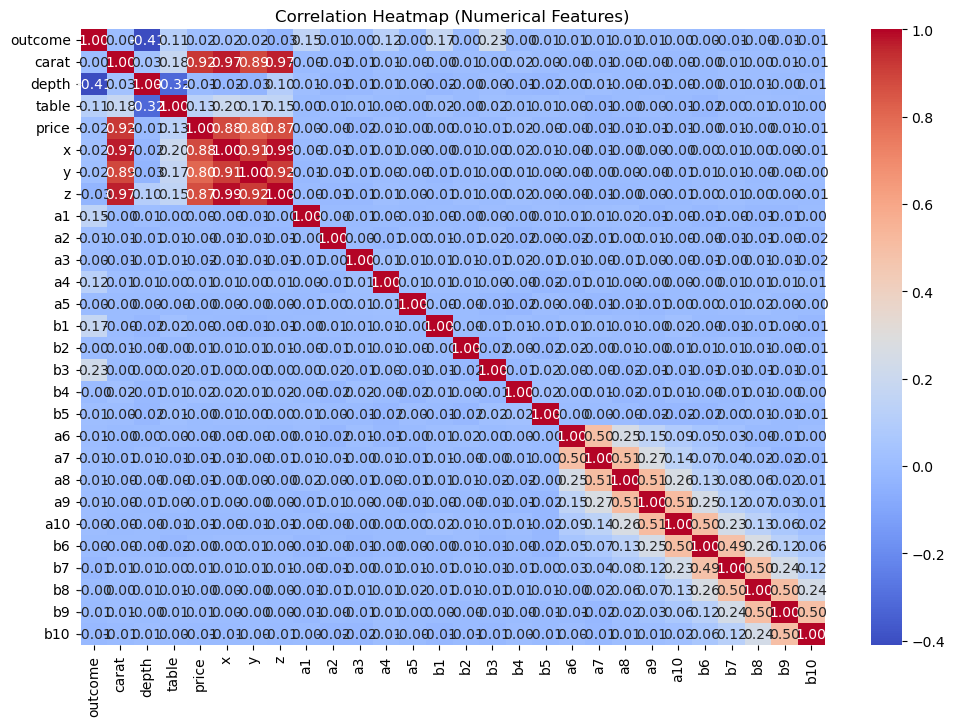


Correlation Matrix:
          outcome     carat     depth     table     price         x         y  \
outcome  1.000000  0.002538 -0.411073  0.114977  0.016967  0.020354  0.015924   
carat    0.002538  1.000000  0.032871  0.180592  0.921337  0.972369  0.886102   
depth   -0.411073  0.032871  1.000000 -0.318129 -0.006831 -0.022083 -0.031090   
table    0.114977  0.180592 -0.318129  1.000000  0.129625  0.195583  0.169566   
price    0.016967  0.921337 -0.006831  0.129625  1.000000  0.881839  0.804969   
x        0.020354  0.972369 -0.022083  0.195583  0.881839  1.000000  0.908962   
y        0.015924  0.886102 -0.031090  0.169566  0.804969  0.908962  1.000000   
z       -0.031470  0.966539  0.102397  0.152102  0.873111  0.985700  0.915254   
a1       0.149101 -0.003863  0.007928  0.000829  0.004798 -0.004470 -0.010528   
a2       0.008760 -0.007023 -0.011842  0.007418 -0.000904 -0.006855 -0.006945   
a3       0.003126 -0.011716 -0.010678  0.013407 -0.015322 -0.008579 -0.008147   
a4     

In [7]:
# Correlation check (only numerical columns)
numerical_df = train_df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

print("\nCorrelation Matrix:")
print(correlation_matrix)

## Multicollinearity Check

In [21]:
# Flag highly correlated numeric feature pairs
corr_abs = numerical_df.corr().abs()
mask = np.triu(np.ones_like(corr_abs, dtype=bool), k=1)

high_corr = (
    corr_abs.where(mask)
    .stack()
    .sort_values(ascending=False)
)

threshold = 0.8
high_pairs = high_corr[high_corr >= threshold]

print(f"High-correlation pairs (|r| >= {threshold}):")
if high_pairs.empty:
    print("None found above threshold.")
else:
    print(high_pairs)

High-correlation pairs (|r| >= 0.8):
x      z        0.985700
carat  x        0.972369
       z        0.966539
       price    0.921337
y      z        0.915254
x      y        0.908962
carat  y        0.886102
price  x        0.881839
       z        0.873111
       y        0.804969
dtype: float64


## Categorical Variables Analysis

In [8]:
# One-hot encode categorical variables
categorical_cols = ['cut', 'color', 'clarity']
train_encoded = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)

# Get correlations with outcome
correlation_matrix_encoded = train_encoded.corr()
outcome_correlations = correlation_matrix_encoded['outcome'].sort_values(ascending=False)

print("Top 10 correlations with outcome:")
print(outcome_correlations.drop('outcome').head(10))

Top 10 correlations with outcome:
b3             0.225407
b1             0.173719
a1             0.149101
a4             0.122441
table          0.114977
cut_Premium    0.063544
cut_Ideal      0.034769
color_E        0.021906
color_H        0.021096
x              0.020354
Name: outcome, dtype: float64


## Feature Correlations with Outcome

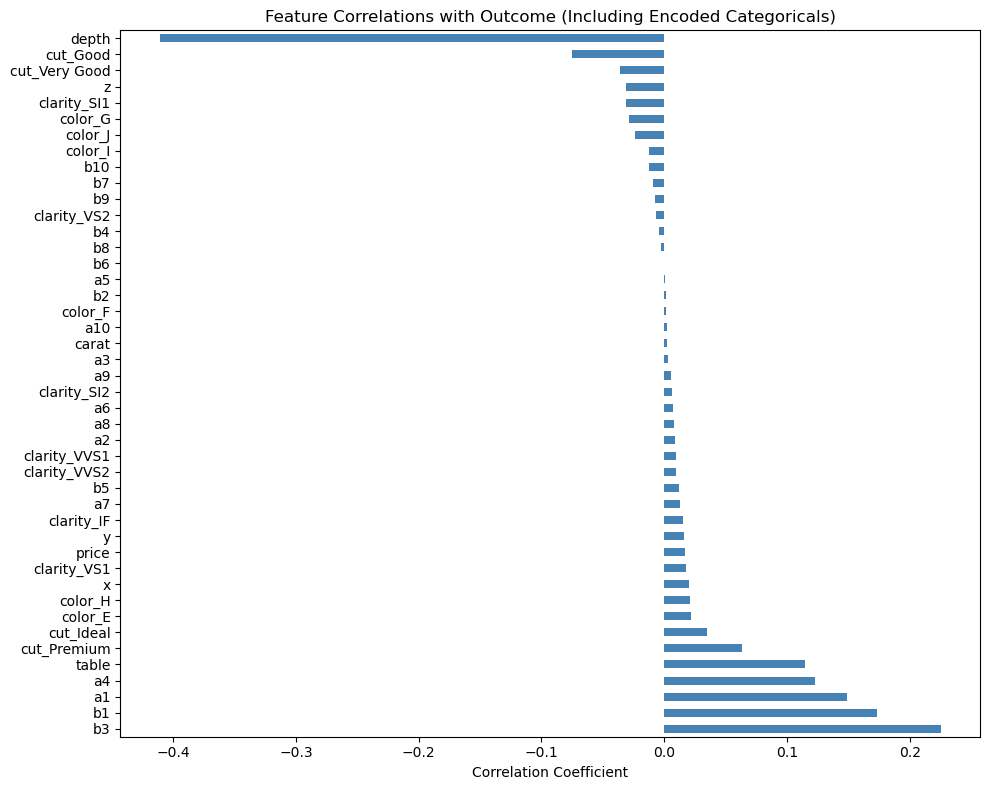

In [9]:
plt.figure(figsize=(10, 8))
outcome_correlations.drop('outcome').plot(kind='barh', color='steelblue')
plt.title("Feature Correlations with Outcome (Including Encoded Categoricals)")
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.show()

## Outliers

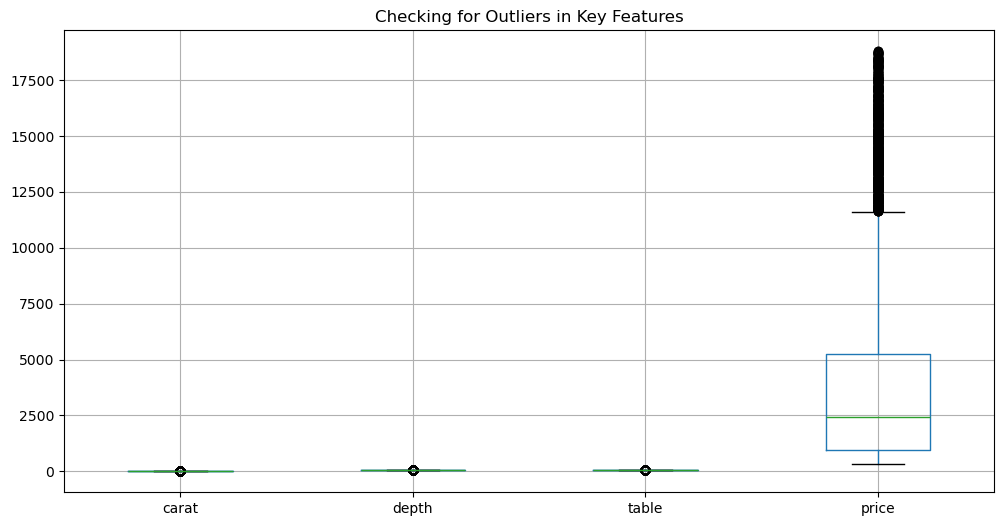

In [17]:
# Code to check for outliers in your top features
top_features = ['carat', 'depth', 'table', 'price']
plt.figure(figsize=(12, 6))
train_df[top_features].boxplot()
plt.title("Checking for Outliers in Key Features")
plt.show()

## Summary Report

In [18]:
print("=" * 60)
print("EXPLORATORY DATA ANALYSIS SUMMARY")
print("=" * 60)

print(f"\n--- Dataset Shape ---")
print(f"Rows: {dataset_shape[0]}, Columns: {dataset_shape[1]}")

print(f"\n--- Missing Values ---")
print(f"Total missing values: {missing_values}")

print(f"\n--- Top 5 Correlations with Outcome (by absolute value) ---")
print(outcome_correlations.drop('outcome').abs().sort_values(ascending=False).head(5))

EXPLORATORY DATA ANALYSIS SUMMARY

--- Dataset Shape ---
Rows: 10000, Columns: 31

--- Missing Values ---
Total missing values: 0

--- Top 5 Correlations with Outcome (by absolute value) ---
depth    0.411073
b3       0.225407
b1       0.173719
a1       0.149101
a4       0.122441
Name: outcome, dtype: float64
